In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
f = pd.read_csv("../../HRM_T1_451723_antsSims.txt", delimiter=',')

In [3]:
data = f[['x','y','t','alpha','id']]

In [4]:
prev_timesteps = 51


In [5]:
dat_id = []
ids = np.unique(data['id'])
sub_traj = 0
epsilon = 100
traj_total = []
y_total = []
for i in np.unique([1,2,3]):
    print(i)
    fi = data[data['id']==i]
    tmp_list = []
    for j in range(np.shape(fi)[0]):
        if(j==0):
            tmp_list.append(fi.iloc[j])
        elif(abs(fi.iloc[j]['x'] - fi.iloc[j-1]['x']) < epsilon and abs(fi.iloc[j]['y'] - fi.iloc[j-1]['y']) < epsilon):
            tmp_list.append(fi.iloc[j])
        else:
            #print("ERROR!", fi.iloc[j]['x'], fi.iloc[j-1]['x'])
            tmp_list = []
        if(len(tmp_list) == prev_timesteps):
            traj_total.append(tmp_list[:-1])
            y_total.append(tmp_list[-1])
            tmp_list = []
    print(np.shape(traj_total))
    sub_traj+=1


1
(1124, 50, 5)
2
(2216, 50, 5)
3
(3346, 50, 5)


In [6]:
y = []
for a in y_total:
    y.append(a['alpha'])
print(np.shape(y))

(3346,)


In [7]:
trajs = []
for a in traj_total:
    ttmp = []
    for k in a:
#         print(np.asarray(k))
        ttmp.append(np.asarray(k[['alpha']]))
    trajs.append(ttmp)
trajs = np.reshape(trajs, (3346, 50))


In [8]:
trajs= np.nan_to_num(trajs)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(trajs, y, test_size=0.33, random_state=42)
print(np.shape(X_train))

(2241, 50)


Feature: 0, Score: 0.00163
Feature: 1, Score: 0.01624
Feature: 2, Score: 0.00334
Feature: 3, Score: 0.00283
Feature: 4, Score: 0.00296
Feature: 5, Score: 0.00320
Feature: 6, Score: 0.00468
Feature: 7, Score: 0.00564
Feature: 8, Score: 0.00670
Feature: 9, Score: 0.00972
Feature: 10, Score: 0.00135
Feature: 11, Score: 0.04406
Feature: 12, Score: 0.00295
Feature: 13, Score: 0.00283
Feature: 14, Score: 0.00272
Feature: 15, Score: 0.00201
Feature: 16, Score: 0.00978
Feature: 17, Score: 0.00745
Feature: 18, Score: 0.04272
Feature: 19, Score: 0.00320
Feature: 20, Score: 0.00395
Feature: 21, Score: 0.00123
Feature: 22, Score: 0.00209
Feature: 23, Score: 0.01720
Feature: 24, Score: 0.00270
Feature: 25, Score: 0.00182
Feature: 26, Score: 0.00110
Feature: 27, Score: 0.00072
Feature: 28, Score: 0.00107
Feature: 29, Score: 0.00196
Feature: 30, Score: 0.05075
Feature: 31, Score: 0.03107
Feature: 32, Score: 0.00232
Feature: 33, Score: 0.00408
Feature: 34, Score: 0.00305
Feature: 35, Score: 0.00273
Fe

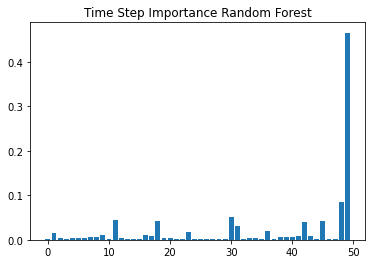

In [10]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
# define dataset
# define the model
model = RandomForestRegressor(max_depth=5)
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Time Step Importance Random Forest")
plt.savefig("RFImportance10.png")
plt.show()

In [11]:
from sklearn.tree import export_graphviz
estimator = model.estimators_[5]
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
#                 feature_names = iris.feature_names,
#                 class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [12]:
def create_forest_traj(a, max_length=1500):
    final = list(a)
    i = len(a)
    while(i < max_length):
        ai = model.predict(a.reshape(1,-1))
        final.append(float(ai))
        a = np.asarray(final[-50:])
        i+=1
    return final

In [13]:
print(np.shape(X_test[0,:]))

(50,)


In [14]:
traj = create_forest_traj(X_test[0,:],max_length = 200)

In [15]:
print(np.shape(traj))
print(traj[-50:])

(200,)
[2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116, 2.303374015902116]


In [16]:
def convert_to_xy(a,l=0.1):
    xx = [0]
    yy = [0]
    for i in range(len(a)):
        xi = xx[i] + (l * math.cos(a[i]))
        yi = yy[i] + (l * math.sin(a[i]))
        i+=1
        xx.append(xi)
        yy.append(yi)
    return xx, yy

In [17]:
[x,y] = convert_to_xy(traj)

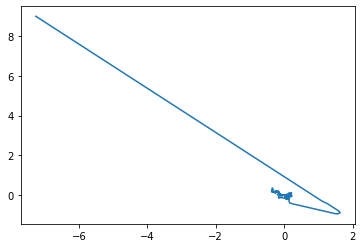

In [18]:
plt.plot(x,y)

In [19]:
print(max(x),max(y),min(x),min(y))

1.6345918230356897 8.992508923957955 -7.255641157144592 -0.9457052656902215
